In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check the shapes after preprocessing
print(f'Normalized training data shape: {X_train.shape}')
print(f'One-hot encoded training labels shape: {y_train.shape}')

Normalized training data shape: (50000, 32, 32, 3)
One-hot encoded training labels shape: (50000, 10)


In [ ]:
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2,2)),  # Pooling layer

    Conv2D(120, (5, 5), activation='relu'),

    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with early stopping
trained = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2752 - loss: 1.9339 - val_accuracy: 0.4554 - val_loss: 1.5179 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4654 - loss: 1.4652 - val_accuracy: 0.5089 - val_loss: 1.3695 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5274 - loss: 1.3112 - val_accuracy: 0.5411 - val_loss: 1.2923 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5599 - loss: 1.2296 - val_accuracy: 0.5758 - val_loss: 1.2046 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5887 - loss: 1.1541 - val_accuracy: 0.5628 - val_loss: 1.2230 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6078 - loss: 1.1003 - val_accuracy: 0.5927 - val_loss: 1.1468 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6272 - loss: 1.0491 - 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Epoch')

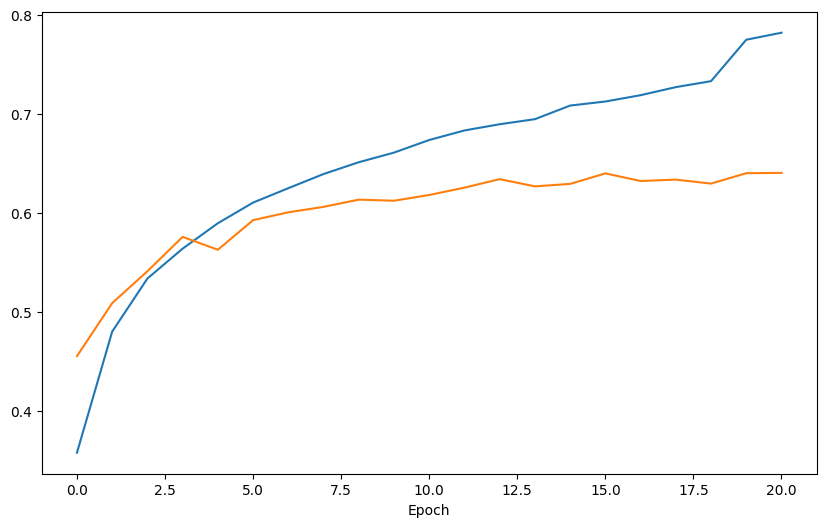

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Get the predicted class labels

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

accuracy = accuracy_score(y_test_multiclass, y_pred)
precision = precision_score(y_test_multiclass, y_pred, average='weighted')
recall = recall_score(y_test_multiclass, y_pred, average='weighted')
f1 = f1_score(y_test_multiclass, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test_multiclass, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6312
Precision: 0.6368495284467242
Recall: 0.6312
F1 Score: 0.6294464873350873

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1000
           1       0.73      0.75      0.74      1000
           2       0.64      0.41      0.50      1000
           3       0.41      0.56      0.48      1000
           4       0.58      0.54      0.56      1000
           5       0.56      0.45      0.50      1000
           6       0.70      0.73      0.72      1000
           7       0.67      0.72      0.70      1000
           8       0.76      0.72      0.74      1000
           9       0.64      0.69      0.67      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

